In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request, urllib.parse, urllib.error

url = "https://data.enedis.fr/explore/dataset/consommation-electrique-par-secteur-dactivite-commune/download/?format=csv&refine.annee=2016&timezone=Europe/Berlin&use_labels_for_header=true"
file_name ="consommation-electrique-par-secteur-dactivite-commune.csv"

print("downloading with urllib")
urllib.request.urlretrieve(url, file_name)
local_filename, headers = urllib.request.urlretrieve(url)
print("Done !\n")

In [1]:
# Load and print some cells
import urllib.request, urllib.parse, urllib.error
import pandas as pd
df = pd.read_csv("consommation-electrique-par-secteur-dactivite-commune.csv", sep=";")
df.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Année,Nom commune,Code commune,Nom EPCI,Code EPCI,Type EPCI,Nom département,Code département,Nom région,Code région,...,Résidences principales avant 1919,Résidences principales de 1919 à 1945,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2010,Résidences principales après 2011,Taux de chauffage électrique,Geo Shape,Geo Point 2D
0,2016,Seyre,31546,CC Coteaux du Lauragais Sud (Co.Laur.Sud),243100179,CC,Haute-Garonne,31,Occitanie,76,...,23.404272,2.127638,12.766082,17.021358,14.893720,6.382914,23.404017,34.042461,"{""type"": ""Polygon"", ""coordinates"": [[[1.678708...","43.3635974739, 1.66366858427"
1,2016,Étreval,54185,CC du Pays du Saintois,200035772,CC,Meurthe-et-Moselle,54,Grand-Est,44,...,57.692423,11.538634,3.846211,11.538634,7.692423,7.692423,0.000000,11.538634,"{""type"": ""Polygon"", ""coordinates"": [[[6.067205...","48.4566428205, 6.05278055195"
2,2016,Gensac-de-Boulogne,31218,CC du Boulonnais,200023554,CC,Haute-Garonne,31,Occitanie,76,...,55.769231,7.692308,7.692308,11.538462,13.461538,3.846154,0.000000,7.692308,"{""type"": ""Polygon"", ""coordinates"": [[[0.614595...","43.2594000005, 0.603518588147"
3,2016,Senlisse,78590,CC de la Haute Vallée de Chevreuse,200033173,CC,Yvelines,78,Île-de-France,11,...,36.073052,10.502299,16.894977,19.178076,9.589060,4.109578,3.652958,28.767135,"{""type"": ""Polygon"", ""coordinates"": [[[2.000770...","48.6854168939, 1.97129695793"
4,2016,Lapte,43114,CC des Sucs,244301016,CC,Haute-Loire,43,Auvergne-Rhône-Alpes,84,...,27.840909,10.795455,10.085227,22.585227,16.477273,7.528409,4.687500,17.187500,"{""type"": ""Polygon"", ""coordinates"": [[[4.289360...","45.1795870032, 4.2350240441"


In [2]:
# Parse an XML File
# ---------------------

import feedparser

#import Keyboard
# Function to fetch the rss feed and return the parsed RSS
def parseRSS( rss_url ):
    return feedparser.parse( rss_url ) 
    
# Function grabs the rss feed headlines (titles) and returns them as a list
def getHeadlines( rss_url ):
    headlines = []
    
    feed = parseRSS( rss_url )
    for newsitem in feed['items']:
        headlines.append(newsitem['title'])
    
    return headlines

def find_between_r( s, first, last ):
    try:
        start = s.rindex( first ) + len( first )
        end = s.rindex( last, start )
        return s[start:end]
    except ValueError:
        return ""

# A list to hold all headlines
allheadlines = []
listzip = []
zipcode = 0
# List of RSS feeds that we will fetch and combine
newsurls = {
    'rssImmo':           'https://www.paruvendu.fr/pa/rss/default/rssImmo'
}
 
# Iterate over the feed urls
for key,url in newsurls.items():
    # Call getHeadlines() and combine the returned headlines with allheadlines
    allheadlines.extend( getHeadlines( url ) )

def find_between_r( s, first, last ):
    try:
        start = s.rindex( first ) + len( first )
        end = s.rindex( last, start )
        return int(s[start:end])
    except ValueError:
        return ""
    
# Iterate over the allheadlines list and print each headline
for hl in allheadlines:
    listzip.append(find_between_r(hl, '(', ')'))
    print(hl)
    
for zipi in listzip:
    print(zipi)
#zipcode = int(input('Enter a ZipCode among all of them: '))

Ambronay (01500) - Maison 7 pièces, 120 m²
Puissalicon (34480) - Appartement 4 pièces, 74 m²
- Immeuble, 500 m²
- Appartement 4 pièces, 64 m²
- Maison 9 pièces, 400 m²
Thonon-les-Bains (74200) - Appartement 2 pièces, 45 m²
Grenoble (38000) - Appartement 1 pièce, 29 m²
Vierzon (18100) - Maison 4 pièces, 98 m²
Belleville (69220) - Terrain, 312 m²
Belleville (69220) - Terrain, 567 m²
Belleville (69220) - Terrain, 375 m²
Belleville (69220) - Maison 4 pièces, 85 m²
Belleville (69220) - Terrain, 326 m²
Limas (69400) - Terrain, 522 m²
Limas (69400) - Terrain, 615 m²
Limas (69400) - Terrain, 1 m²
Saint-Cyr-sur-Menthon (01380) - Maison 5 pièces, 98 m²
Racquinghem (62120) - Maison 4 pièces, 80 m²
Boulogne-sur-Mer (62200) - Appartement 3 pièces, 70 m²
Racquinghem (62120) - Maison 5 pièces, 80 m²
Merville (59660) - Maison, 95 m²
Waben (62180) - Maison 5 pièces, 108 m²
Nice (06000) - Appartement 9 pièces
Inglange (57970) - Maison 6 pièces, 102 m²
Fontoy (57650) - Maison 6 pièces, 300 m²
Eybens (383

In [3]:
while zipcode not in listzip:
      zipcode = int(input('Please, enter a ZipCode among all of them: '))
print("The zipcode ", zipcode, " is valid !")

Please, enter a ZipCode among all of them: 06000
The zipcode  6000  is valid !


In [14]:
from matplotlib import style
%matplotlib inline

colonnes = ['Nom commune', 'Nb sites Industrie','Taux de logements collectifs', 'Conso moyenne Résidentiel (MWh)', 'Code département']
df2 = df.loc[(df['Code département'] == int(depcode)),colonnes].mean()
a_mean = df2['Nb sites Industrie']

rest_cities = df.loc[(df['Code département'] == int(depcode)) & (df['Nb sites Industrie'] < a_mean),colonnes].head(10)
rest_cities

,Nom commune,Nb sites Industrie,Taux de logements collectifs,Conso moyenne Résidentiel (MWh),Code département
22,Bitry,1,0.643965,7.036086,60
302,Offoy,0,0.000000,NaN,60
478,Ève,0,19.624200,9.281089,60
520,Grez,0,0.000000,6.281592,60
640,Villotran,0,0.000000,NaN,60
688,La Houssoye,0,5.984264,8.553099,60
764,Villers-Vicomte,0,1.298701,NaN,60
880,Campeaux,0,1.229508,5.929185,60
1033,Serans,0,0.000000,8.117062,60
1117,Montagny-en-Vexin,1,2.834125,10.672610,60


In [20]:
print("In this department, the average consumption costs \n",a_mean, "MWh * 42 (the price of a MWh) ", round(42*a_mean,3), "€")

In this department, the average consumption costs 
 1.6986899563318778 MWh * 42 (the price of a MWh)  71.345 €


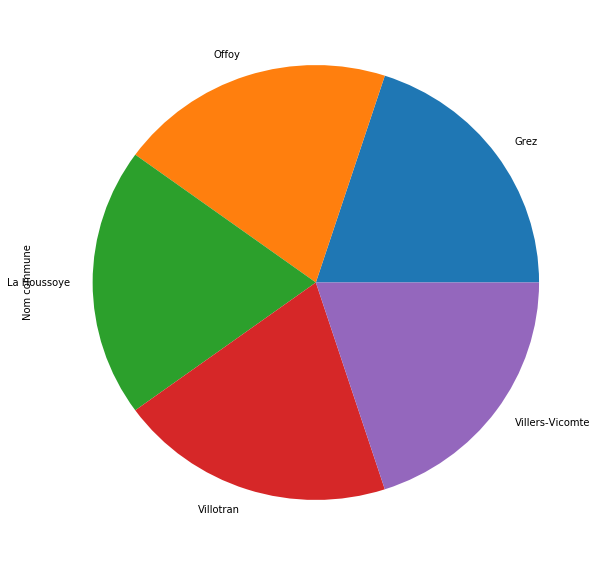

In [21]:
from matplotlib import style
%matplotlib inline

colonnes = ['Nom commune', 'Nb sites Industrie','Taux de logements collectifs', 'Conso moyenne Résidentiel (MWh)']
r = df.loc[(df['Code département'] == int(depcode)) & (df['Nb sites Industrie'] == 0) & (df['Taux de logements collectifs'] < 17),colonnes].head(5)
r
r['Nom commune'].value_counts('Taux de logements collectifs').plot.pie(figsize=(10,10))

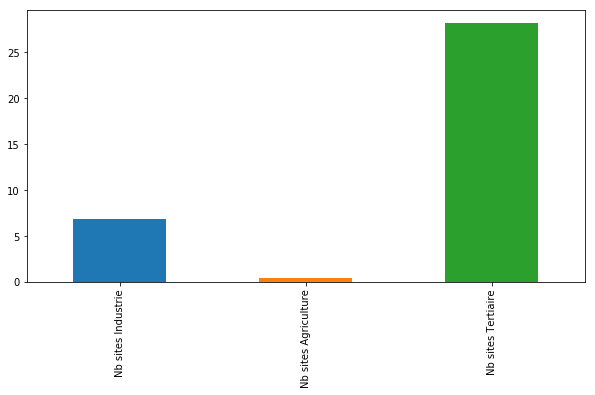

In [24]:
#Ici vous pouvez voir dans quel secteur il peut* avoir le moins ou le moins d'activité

%matplotlib inline

df2 = df.loc[(df['Code département'] == int(depcode)),colonnes].mean()
a_mean = df2['Nb sites Industrie']

colonnes = ['Nom commune', 'Nb sites Industrie','Nb sites Agriculture','Nb sites Tertiaire']
df1=df.loc[(df['Code département'] == int(depcode)) & (df['Nb sites Industrie'] > a_mean),colonnes]
a=np.mean(df1)
a.plot.bar(figsize=(10,5))

,Nb sites Industrie
count,410.000000
mean,0.517073
std,0.959294
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,4.000000


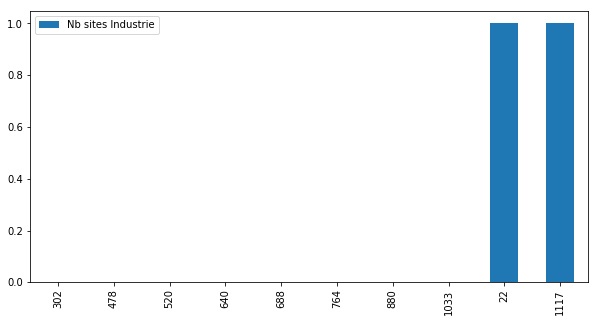

In [25]:
from statistics import *

colonnes = ['Nom commune', 'Nb sites Industrie']
df1=df.loc[(df['Code département'] == int(depcode)) & (df['Nb sites Industrie'] < 5),colonnes]
df1.head(10).sort_values("Nb sites Industrie").plot.bar(figsize=(10,5))
df1.describe()

      Nom commune  Nb sites Industrie
2701        Creil                  31
23689    Beauvais                  64
24329   Compiègne                  59


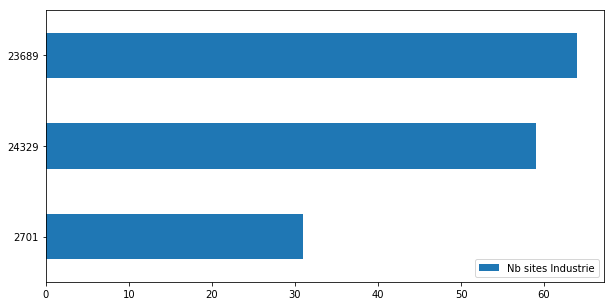

In [29]:
colonnes = ['Nom commune', 'Nb sites Industrie']

r=df.loc[(df['Code département'] == int(depcode)) & (df['Nb sites Industrie'] > 30),colonnes]
print(r)
r.sort_values('Nb sites Industrie').plot.barh(figsize=(10,5))

In [57]:
from statistics import *

df2 = df.loc[(df['Code département'] == int(depcode)),colonnes].mean()
df2['Nb sites Industrie']

3.0427350427350426